##                                                  Project: Global Trends Analysis 

### Problem Statement: 

The modern world is shaped by complex dynamics in population, health, and economics, making understanding these trends vital for informed policy-making. GlobalTrends, a leading analytics firm, is dedicated to deciphering these patterns through a comprehensive analysis of the Gapminder dataset. Your role in this project is to conduct an in-depth Exploratory Data Analysis (EDA), uncovering the intricate relationships between demographic changes, economic development, and health advancements over recent decades.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load The Data

### Objective questions
#### 1. Load the dataset and display the first few rows.

In [2]:
dataset = pd.read_csv('gapminder_full.csv')
dataset.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


####  How many countries does the dataset have?

In [3]:
countries_count = dataset['country'].nunique()
countries_count

142

In [4]:
dataset.shape

(1704, 6)

In [5]:
# Check for null values

dataset.isnull().sum()

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

#### 2. Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.


In [6]:
pvt_tbl = pd.pivot_table(data = dataset, index = 'continent', values = 'life_exp', columns = 'year', aggfunc = 'mean', fill_value = 0)
pvt_tbl

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


#### 3. Which countries had a GDP per capita higher than the 75th percentile in 2007?


In [7]:
# for year 2007

year_2007 = dataset[dataset['year'] == 2007]

# find 75th percentile of gdp_cap

gdp_75th = year_2007['gdp_cap'].quantile(0.75)

# countries having gdp higher than 75th percentile

countries_higher_than_75th_per = year_2007[year_2007['gdp_cap'] > gdp_75th]['country'].unique()
countries_higher_than_75th_per

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico',
       'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom',
       'United States'], dtype=object)

#### 4. Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'

In [8]:
# Define labels

labels = ['Low','Medium', 'High', 'Very High']
dataset['Life_Exp_Range'] = pd.cut(dataset['life_exp'], bins = 4, labels = labels)
dataset.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low


#### 5. Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.


<BarContainer object of 5 artists>

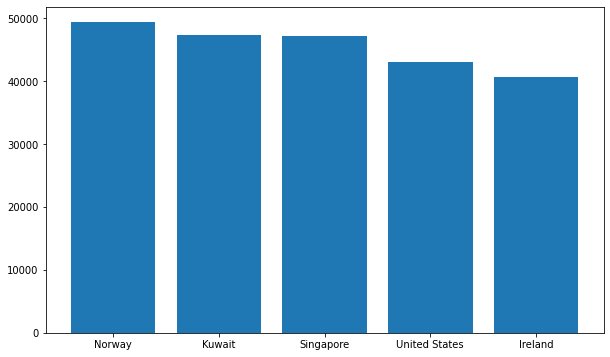

In [9]:
df_2007 = dataset[dataset['year'] == 2007].sort_values(by = 'gdp_cap', ascending = False)
plot_chart = df_2007[['country', 'gdp_cap']].head(5)
plot_chart

# Plot the chart

plt.figure(figsize=(10, 6))
x_asix = plot_chart['country']
y_axis = plot_chart['gdp_cap']
plt.bar(x_asix,y_axis)

#### 6. Find all country names that start with "I" and end with "a" using regex.


In [10]:
df_I_a = dataset[dataset['country'].str.contains(r'^I.*a$', regex =True)]['country']
df_I_a.unique()

array(['India', 'Indonesia'], dtype=object)

#### 7. Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.


In [11]:
# 2007 dataset

dataset_2007 = dataset[dataset['year'] == 2007]
dataset_2007.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
11,Afghanistan,2007,31889923,Asia,43.828,974.580338,Medium
23,Albania,2007,3600523,Europe,76.423,5937.029526,Very High
35,Algeria,2007,33333216,Africa,72.301,6223.367465,Very High
47,Angola,2007,12420476,Africa,42.731,4797.231267,Medium
59,Argentina,2007,40301927,Americas,75.320,12779.379640,Very High


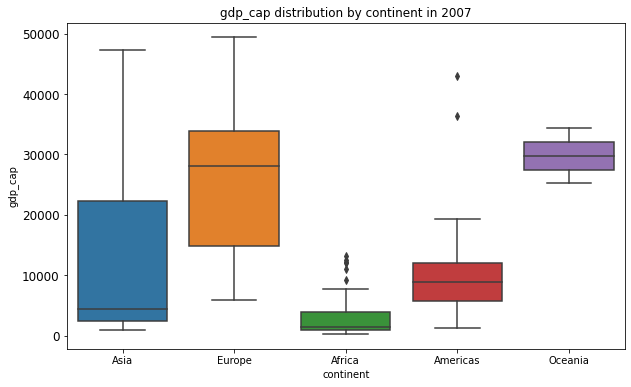

In [12]:
# Box plot

plt.figure(figsize=(10,6))
sns.boxplot(x = 'continent', y = "gdp_cap", data = dataset_2007)
plt.yticks(fontsize=12)
plt.xlabel('continent')
plt.ylabel('gdp_cap')
plt.title('gdp_cap distribution by continent in 2007', fontsize=12)
plt.show()

#### 8. Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.


In [13]:
# dataset with life expectancy of over 80 years in 2007.

life_exp_over_80_df = dataset_2007[dataset_2007['life_exp'] > 80]

# countries and their respective continents.

countries_life_exp_over_80_df = life_exp_over_80_df[['country','continent']]
countries_life_exp_over_80_df

,country,continent
71,Australia,Oceania
251,Canada,Americas
539,France,Europe
671,"Hong Kong, China",Asia
695,Iceland,Europe
767,Israel,Asia
779,Italy,Europe
803,Japan,Asia
1103,New Zealand,Oceania
1151,Norway,Europe


#### 9. Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).


In [14]:
# Convert year to datetime type

dataset['year'] = pd.to_datetime(dataset['year'], format = '%Y')

# Extract decade

dataset['Decade'] = (dataset['year'].dt.year // 10) * 10
dataset

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,Decade
0,Afghanistan,1952-01-01,8425333,Asia,28.801,779.445314,Low,1950
1,Afghanistan,1957-01-01,9240934,Asia,30.332,820.853030,Low,1950
2,Afghanistan,1962-01-01,10267083,Asia,31.997,853.100710,Low,1960
3,Afghanistan,1967-01-01,11537966,Asia,34.020,836.197138,Low,1960
4,Afghanistan,1972-01-01,13079460,Asia,36.088,739.981106,Low,1970
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987-01-01,9216418,Africa,62.351,706.157306,High,1980
1700,Zimbabwe,1992-01-01,10704340,Africa,60.377,693.420786,High,1990
1701,Zimbabwe,1997-01-01,11404948,Africa,46.809,792.449960,Medium,1990
1702,Zimbabwe,2002-01-01,11926563,Africa,39.989,672.038623,Medium,2000


#### 10. Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.


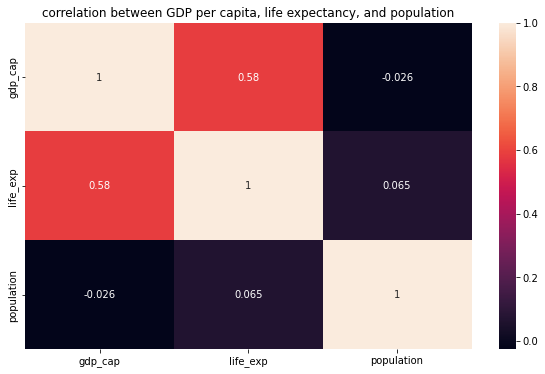

In [15]:
# find correlation
corr_matrix = dataset[['gdp_cap','life_exp','population']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot = True)
plt.title('correlation between GDP per capita, life expectancy, and population')
plt.show()

#### 11. How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.
Subjective Question: Discuss the various reasons that could have contributed to the change.


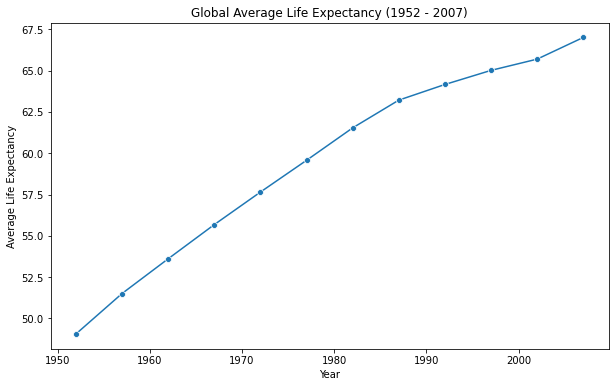

In [16]:
plt.figure(figsize=(10,6))

#x_asix = dataset['year']
life_exp_group = dataset.groupby('year')['life_exp'].mean().reset_index()

sns.lineplot(x = 'year', y = 'life_exp', data = life_exp_group, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Global Average Life Expectancy (1952 - 2007)')
plt.show()

1. The graph avove reprsents an upward trend indicating improvements in life expectancy over the years. 

2. This is a result of a combination of various factors.

3. This includes medical advancements, economic development, improved public health initiatives, and better nutrition. 

5. Adavance in Healthcare: The development in vaccines, antibiotics and other medical treatments and advanced surgical techniques have signifacantly reduced the infectious diseasses, contributing to increased life expectancy.

4. Health initiatives: Increase in awareness and education about health practices, such as vaccination, proper nutrition, and exercise, Improved sanitation, clean drinking water, and better waste management practices have helped improve overall health outcomes.

5. Nutrition and Food: The Green Revolution and advances in agricultural practices have increased food production, reducing malnutrition, which are critical factors affecting life expectancy.

6. Economic Development: Economic growth in many parts of the world has led to higher income levels, which in turn have improved access to healthcare, better nutrition, and healthier living conditions.

7. Better infrastructure, including transportation and communication systems, has facilitated the delivery of healthcare services, especially in remote areas.

These factors have collectively contributed to longer and healthier lives across much of the world. 


#### 12. For the year 2007, analyze the relationship between life expectancy and GDP per capita. Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.


In [17]:
# For the year 2007

dataset_2007.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
11,Afghanistan,2007,31889923,Asia,43.828,974.580338,Medium
23,Albania,2007,3600523,Europe,76.423,5937.029526,Very High
35,Algeria,2007,33333216,Africa,72.301,6223.367465,Very High
47,Angola,2007,12420476,Africa,42.731,4797.231267,Medium
59,Argentina,2007,40301927,Americas,75.320,12779.379640,Very High


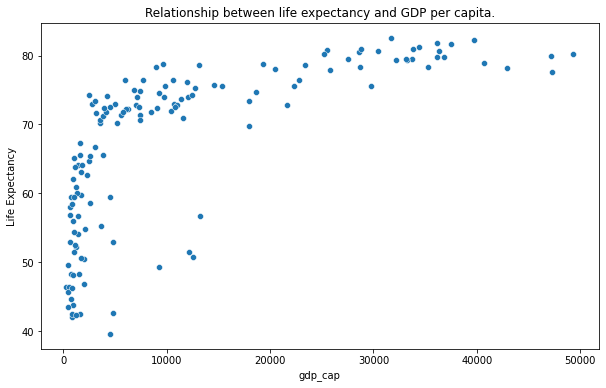

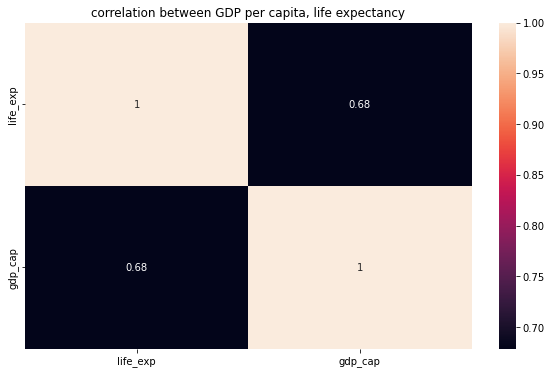

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(x = 'gdp_cap', y = 'life_exp', data = dataset_2007)

plt.xlabel('gdp_cap')
plt.ylabel('Life Expectancy')
plt.title('Relationship between life expectancy and GDP per capita.')
plt.show()


# Correlation

corr_dataset = dataset_2007[['life_exp', 'gdp_cap']].corr()
#corr_dataset
plt.figure(figsize=(10, 6))
sns.heatmap(corr_dataset, annot = True)
plt.title('correlation between GDP per capita, life expectancy')
plt.show()

1. Both scatter plot and correlation analysis reveal a positive relationship between GDP per capita and life expectancy, with a correlation of 0.68 suggesting a moderate positive relationship. 

2. While higher GDP per capita generally leads to better living conditions and healthcare, and thus higher life expectancy, it's important to consider other factors that can influence this relationship.

3. Wealth alone does not guarantee a longer life, but it certainly contributes to creating the conditions for a healthier and longer life.

#### 13. Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.
Subjective Question:  Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?


<BarContainer object of 5 artists>

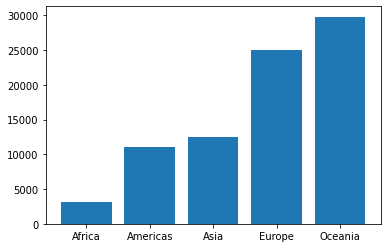

In [19]:
#  average GDP per capita for each continent in the year 2007

avg_gdp = dataset_2007.groupby('continent')['gdp_cap'].mean()
avg_gdp

# Plot the bar chart

x_bar=avg_gdp.index
y_bar=avg_gdp
plt.bar(x_bar,y_bar)

1. Oceania represents Australia and New Zealand, both of which are developed, high-income countries with strong economies. Their GDP per capita is significantly higher compared to many other countries worldwide.

2. Since these two countries dominate the continent in terms of population and economic output, their high GDP per capita strongly influences Oceania's average, pushing it higher.

3. The America includes a diverse range of countries with varying levels of economic development. North America (primarily the United States and Canada) has a high GDP per capita, but Latin American countries, which make up a significant portion of the Americas, generally have lower GDP per capita.

4. The presence of many lower and middle-income countries in Latin America pulls down the overall average GDP per capita for the Americas, despite the high figures from North America.

5. These two countries, with their advanced economies, drive up the average for the entire continent. In contrast, the Americas have a more diverse range of economies, with many countries in Latin America having lower GDP per capita, which brings down the overall average for the continent. 
6. The number of countries and their respective economic weights play a crucial role in shaping these averages.

#### 14. Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
##### 1. for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.



In [20]:
dataset_2007.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
11,Afghanistan,2007,31889923,Asia,43.828,974.580338,Medium
23,Albania,2007,3600523,Europe,76.423,5937.029526,Very High
35,Algeria,2007,33333216,Africa,72.301,6223.367465,Very High
47,Angola,2007,12420476,Africa,42.731,4797.231267,Medium
59,Argentina,2007,40301927,Americas,75.320,12779.379640,Very High


In [21]:
country_Afgha_switz = dataset_2007[dataset_2007['country'].isin(['Afghanistan', 'Switzerland'])]
country_Afgha_switz


,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
11,Afghanistan,2007,31889923,Asia,43.828,974.580338,Medium
1487,Switzerland,2007,7554661,Europe,81.701,37506.419070,Very High


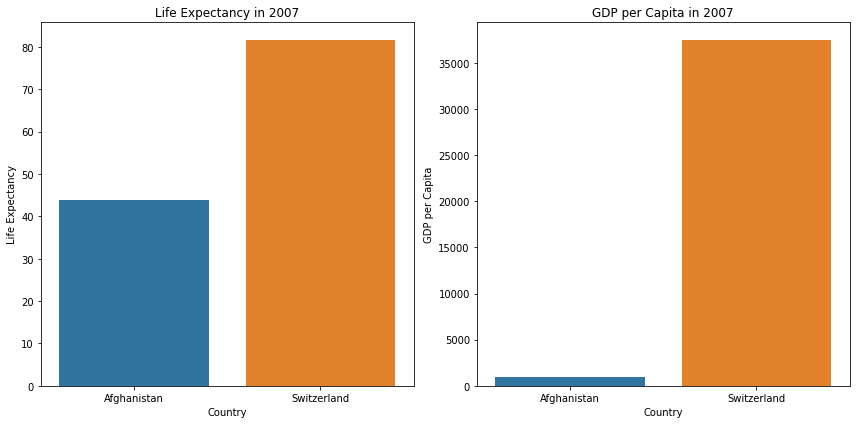

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for life expectancy
sns.barplot(x='country', y='life_exp', data=country_Afgha_switz, ax=axes[0])
axes[0].set_title('Life Expectancy in 2007')
axes[0].set_ylabel('Life Expectancy')
axes[0].set_xlabel('Country')

# Bar chart for GDP per capita
sns.barplot(x='country', y='gdp_cap', data=country_Afgha_switz, ax=axes[1])
axes[1].set_title('GDP per Capita in 2007')
axes[1].set_ylabel('GDP per Capita')
axes[1].set_xlabel('Country')

# Display the plot
plt.tight_layout()
plt.show()

1. The bar chart comparison reveals that Afghanistan, a country affected by prolonged conflicts, has a life expectancy nearly half that of Switzerland, highlighting the severe impact of instability on public health. 

2. Additionally, Afghanistan's GDP per capita is drastically lower, almost negligible when compared to Switzerland, underscoring the economic disparity between a conflict-ridden nation and a peaceful, economically prosperous one.

3. These differences illustrate how peace and stability are critical for both the economic well-being and overall health of a population.

##### 2. Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.

In [23]:
df_Afgha_switz = dataset[dataset['country'].isin(['Afghanistan', 'Switzerland'])]
df_Afgha_switz.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,Decade
0,Afghanistan,1952-01-01,8425333,Asia,28.801,779.445314,Low,1950
1,Afghanistan,1957-01-01,9240934,Asia,30.332,820.853030,Low,1950
2,Afghanistan,1962-01-01,10267083,Asia,31.997,853.100710,Low,1960
3,Afghanistan,1967-01-01,11537966,Asia,34.020,836.197138,Low,1960
4,Afghanistan,1972-01-01,13079460,Asia,36.088,739.981106,Low,1970


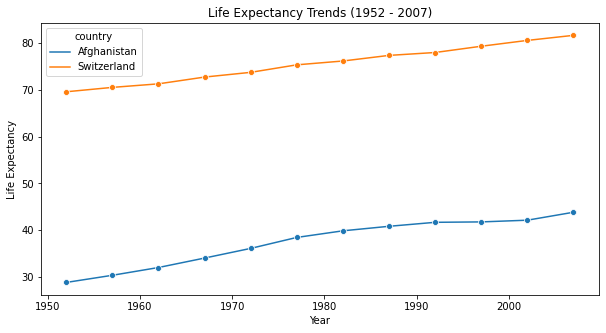

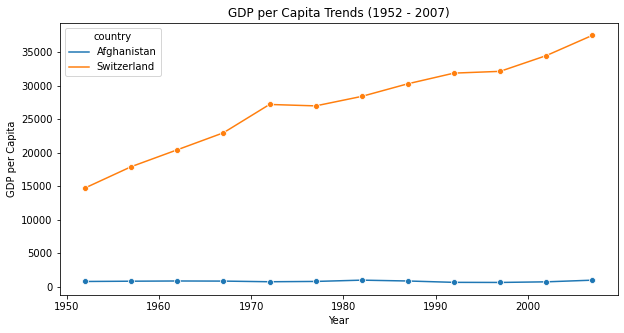

In [24]:
# Line graph for Life Expectancy
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='life_exp', hue='country', data=df_Afgha_switz, marker='o')
plt.title('Life Expectancy Trends (1952 - 2007)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# Line graph for GDP per Capita
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='gdp_cap', hue='country', data=df_Afgha_switz, marker='o')
plt.title('GDP per Capita Trends (1952 - 2007)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

1. The increasing life expectancy in both Afghanistan and Switzerland can be attributed to global advancements in healthcare, public health initiatives, and improved access to medical services. 
2. However, Switzerland's significant rise in GDP per capita reflects its stable governance, diversified economy, and strong global trade connections. 
3. In contrast, Afghanistan's stagnant GDP per capita is a result of prolonged conflicts, political instability, and limited infrastructure, which have hindered economic growth and development.
4. These factors underscore the crucial role of peace, stability, and effective governance in driving both economic and social progress.